In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("EDU_50_Startups_MLR.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.shape

(50, 5)

In [5]:
dataset["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [6]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
features_cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'State']

In [8]:
x = dataset[features_cols]

In [9]:
type(x)

pandas.core.frame.DataFrame

In [10]:
y = dataset["Profit"]

In [11]:
type(y)

pandas.core.series.Series

In [12]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

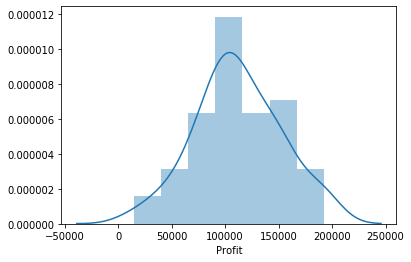

In [13]:
sns.distplot(dataset["Profit"])

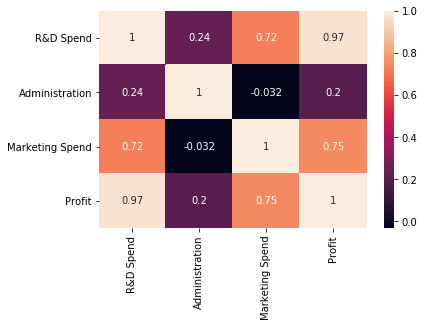

In [14]:
sns.heatmap(dataset.corr(), annot=True)

In [15]:
x.iloc[:,3].values

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

In [16]:
# use onehot encoding for the state 

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
le = LabelEncoder()
#x["State"] = le.fit_transform(x["State"])
x.iloc[:,3] = le.fit_transform(x.iloc[:,3])

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [18]:
x["State"].unique()

array([2, 0, 1])

In [19]:
x.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State                int32
dtype: object

In [20]:
type(x)

pandas.core.frame.DataFrame

In [21]:
x.shape

(50, 4)

In [42]:
pd.DataFrame(x).head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = 0.2, random_state = 102)

In [26]:
x_train.head(2)

,R&D Spend,Administration,Marketing Spend,State
31,61136.38,152701.92,88218.23,2
33,55493.95,103057.49,214634.81,1


In [27]:
type(x_train)

pandas.core.frame.DataFrame

In [28]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(50, 4)
(40, 4)
(10, 4)


In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
regressor.coef_

array([ 8.10816339e-01, -2.88381225e-02,  2.32611697e-02,  1.03573787e+03])

In [31]:
regressor.intercept_

49449.04755409305

In [32]:
y_pred = regressor.predict(x_test)

In [33]:
y_pred

array([ 88285.90840325, 109280.88019949, 110524.21444084, 114940.48897726,
       102793.52519195, 187246.07304278, 117617.68938665, 126007.83887141,
        87447.86749197,  74483.70225974])

In [34]:
from sklearn.metrics import r2_score

In [35]:
r2_score(y_test,y_pred)

0.9700491465905091

# Method 2 for the model creation in details

In [36]:
import statsmodels.api as sm

In [37]:
# Adding coefficient
x_train = sm.add_constant(x_train)

In [38]:
regressor_nm = sm.OLS(endog = y_train , exog=x_train).fit()

In [39]:
regressor_nm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     158.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           6.83e-22
Time:                        21:54:39   Log-Likelihood:                -423.62
No. Observations:                  40   AIC:                             857.2
Df Residuals:                      35   BIC:                             865.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.945e+04   8951.084      5.524      0.000    3.13e+04    6.76e+04
R&D Spend           0.8108      0.054     15.107      0.000       0.702       0.920
Administration     -0.0288      0.068     -0.423      0.675      -0.167       0.109
Marketing Spend     0.0233      0.020      1.156      0.256      -0.018       0.064
State            1035.7379   2027.996      0.511      0.613   -3081.314    5152.789
==============================================================================
Omnibus:                        9.472   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.106
Skew:                          -0.858   Prob(JB):                       0.0105
Kurtosis:                       4.586   Cond. No.                     1.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

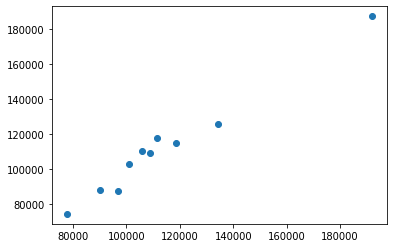

In [40]:
#scatter plot the pred vs actual
plt.scatter(y_test,y_pred)

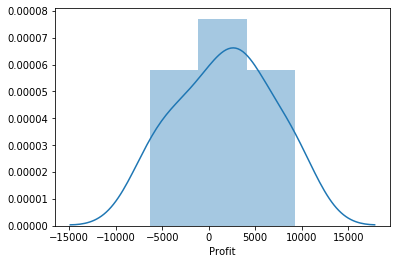

In [41]:
#Histogram plot for residual , if normally distributed then good

sns.distplot((y_test - y_pred))